<img src="téléchargement.png">

# Projet 05 du parcours data scientist

## Segmentez des clients d'un site e-commerce

<img src="olist.png">

### Rappel des objectifs 

<img src="olist2.png">

### Plan 

### I.Mise en place

In [1]:
! pip install yellowbrick

In [2]:
!pip install kmodes

In [3]:
import pandas as pd
import numpy as np

import missingno as msn

import seaborn as sns

import matplotlib.pyplot as plt

import plotly.graph_objs as go

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import homogeneity_score, adjusted_rand_score, adjusted_mutual_info_score

from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer, InterclusterDistance
from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

from time import time

#Import librairie faite maison
import Contrat_Maintenance_Olist as fct

In [4]:
conda list scikit

# packages in environment at C:\Users\archi\anaconda3:
#
# Name                    Version                   Build  Channel
scikit-image              0.18.3           py39hf11a4ad_0  
scikit-learn              1.1.1                    pypi_0    pypi
scikit-learn-intelex      2021.3.0         py39haa95532_0  

Note: you may need to restart the kernel to use updated packages.


### II.La donnée brute

<img src = 'olist3.png'>

In [5]:
df_seg = pd.read_csv('./datasets/olist_customers_segmentation_test.csv', index_col = 0)

In [6]:
print(f'Le jeu de données df_seg contient {df_seg.shape[0]} lignes et {df_seg.shape[1]} colonnes')

Le jeu de données df_seg contient 93358 lignes et 24 colonnes


In [7]:
df_seg.head(5)

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2        1.0       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f        1.0        27.19   
0000f46a3911fa3c0805444483337064        1.0        86.22   
0000f6ccb0745a6a4b88665a16c9f078        1.0        43.62   
0004aac84e0df4da2b147fca70cf8255        1.0       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  books_cds_media  \
customer_unique_id                                                       
0000366f3b9a7992bf8c76cfdf3221e2                  5.0              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  5.0              0.0   
0000f46a3911fa3c0805444483337064                  3.0              0.0   
0000f6ccb0745a6a4b88665a16c9f078                 10.0              0.0   
0004aac84e0df4da2b147fca70cf8255                 11.0              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  ...  sport  technology  toys_baby  \
customer_unique_id                ...                                 
0000366f3b9a7992bf8c76cfdf3221e2  ...    0.0         0.0        0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f  ...    0.0         0.0        0.0   
0000f46a3911fa3c0805444483337064  ...    0.0         0.0        0.0   
0000f6ccb0745a6a4b88665a16c9f078  ...    0.0         1.0        0.0   
0004aac84e0df4da2b147fca70cf8255  ...    0.0         1.0        0.0   

                                  total_items  mean_nb_items  \
customer_unique_id                                             
0000366f3b9a7992bf8c76cfdf3221e2          1.0            1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f          1.0            1.0   
0000f46a3911fa3c0805444483337064          1.0            1.0   
0000f6ccb0745a6a4b88665a16c9f078          1.0            1.0   
0004aac84e0df4da2b147fca70cf8255          1.0            1.0   

                                  order_mean_delay  freight_ratio  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2             

In [8]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 93358 entries, 0000366f3b9a7992bf8c76cfdf3221e2 to ffffd2657e2aad2907e67c3e9daecbeb
Data columns (total 24 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   nb_orders                     93358 non-null  float64
 1   total_spend                   93358 non-null  float64
 2   mean_payment_sequential       93358 non-null  float64
 3   mean_payment_installments     93358 non-null  float64
 4   mean_review_score             93358 non-null  float64
 5   mean_delivery_days            93358 non-null  float64
 6   favorite_sale_month           93358 non-null  float64
 7   books_cds_media               93358 non-null  float64
 8   fashion_clothing_accessories  93358 non-null  float64
 9   flowers_gifts                 93358 non-null  float64
 10  groceries_food_drink          93358 non-null  float64
 11  health_beauty                 93358 non-null  float64
 12  home_fu

In [9]:
df_seg.isna().sum()

nb_orders                         0
total_spend                       0
mean_payment_sequential           0
mean_payment_installments         0
mean_review_score                 0
mean_delivery_days                0
favorite_sale_month               0
books_cds_media                   0
fashion_clothing_accessories      0
flowers_gifts                     0
groceries_food_drink              0
health_beauty                     0
home_furniture                    0
other                             0
sport                             0
technology                        0
toys_baby                         0
total_items                       0
mean_nb_items                     0
order_mean_delay                  0
freight_ratio                     0
mean_price_order                  0
customer_zip_code_prefix          0
harvesine_distance              255
dtype: int64

In [10]:
df_seg.isna().mean()*100

nb_orders                       0.000000
total_spend                     0.000000
mean_payment_sequential         0.000000
mean_payment_installments       0.000000
mean_review_score               0.000000
mean_delivery_days              0.000000
favorite_sale_month             0.000000
books_cds_media                 0.000000
fashion_clothing_accessories    0.000000
flowers_gifts                   0.000000
groceries_food_drink            0.000000
health_beauty                   0.000000
home_furniture                  0.000000
other                           0.000000
sport                           0.000000
technology                      0.000000
toys_baby                       0.000000
total_items                     0.000000
mean_nb_items                   0.000000
order_mean_delay                0.000000
freight_ratio                   0.000000
mean_price_order                0.000000
customer_zip_code_prefix        0.000000
harvesine_distance              0.273142
dtype: float64

In [11]:
df_seg.duplicated().sum()

2

In [12]:
df_seg.nunique()

nb_orders                           9
total_spend                     32014
mean_payment_sequential            37
mean_payment_installments         122
mean_review_score                  68
mean_delivery_days                366
favorite_sale_month                12
books_cds_media                     7
fashion_clothing_accessories       16
flowers_gifts                      17
groceries_food_drink               13
health_beauty                      15
home_furniture                     28
other                              25
sport                              14
technology                         18
toys_baby                          14
total_items                        19
mean_nb_items                      41
order_mean_delay                  935
freight_ratio                     161
mean_price_order                 9057
customer_zip_code_prefix        14878
harvesine_distance              14726
dtype: int64

In [13]:
df_seg.describe().transpose()

count          mean           std  \
nb_orders                     93358.0      1.033420      0.209097   
total_spend                   93358.0    165.168210    226.292101   
mean_payment_sequential       93358.0      1.043872      0.364435   
mean_payment_installments     93358.0      2.965951      2.717719   
mean_review_score             93358.0      4.158806      1.278290   
mean_delivery_days            93358.0     12.524327      9.550578   
favorite_sale_month           93358.0      6.034759      3.226430   
books_cds_media               93358.0      0.009085      0.094527   
fashion_clothing_accessories  93358.0      0.034082      0.180035   
flowers_gifts                 93358.0      0.094412      0.290952   
groceries_food_drink          93358.0      0.009681      0.097170   
health_beauty                 93358.0      0.121495      0.325329   
home_furniture                93358.0      0.300037      0.455846   
other                         93358.0      0.133696      0.338181   
sport                         93358.0      0.077026      0.265228   
technology                    93358.0      0.152034      0.357663   
toys_baby                     93358.0      0.068452      0.251017   
total_items                   93358.0      1.180370      0.620857   
mean_nb_items                 93358.0      1.139531      0.527075   
order_mean_delay              93358.0    232.502018    154.187659   
freight_ratio                 93358.0      0.208141      0.124892   
mean_price_order              93358.0    137.508262    209.860281   
customer_zip_code_prefix      93358.0  35243.998340  29843.212881   
harvesine_distance            93103.0    446.740994    380.397883   

                                      min          25%           50%  \
nb_orders                        1.000000      1.00000      1.000000   
total_spend                      9.590000     63.01000    107.780000   
mean_payment_sequential          1.000000      1.00000      1.000000   
mean_payment_installments        0.000000      1.00000      2.000000   
mean_review_score                1.000000      4.00000      5.000000   
mean_delivery_days               1.000000      7.00000     10.000000   
favorite_sale_month              1.000000      3.00000      6.000000   
books_cds_media                  0.000000      0.00000      0.000000   
fashion_clothing_accessories     0.000000      0.00000      0.000000   
flowers_gifts                    0.000000      0.00000      0.000000   
groceries_food_drink             0.000000      0.00000      0.000000   
health_beauty                    0.000000      0.00000      0.000000   
home_furniture                   0.000000      0.00000      0.000000   
other                            0.000000      0.00000      0.000000   
sport                            0.000000      0.00000      0.000000   
technology                       0.000000      0.00000      0.000000   
toys_baby                        0.000000      0.00000      0.000000   
total_items                      1.000000      1.00000      1.000000   
mean_nb_items                    1.000000      1.00000      1.000000   
order_mean_delay                 0.000000    108.00000    212.000000   
freight_ratio                    0.000000      0.12000      0.180000   
mean_price_order                 0.850000     46.00000     86.990000   
customer_zip_code_prefix      1003.000000  11410.00000  24455.000000   
harvesine_distance               0.480664    211.66389    308.243696   

                                       75%           max  
nb_orders                         1.000000     15.000000  
total_spend                     182.510000  13664.080000  
mean_payment_sequential           1.000000     26.000000  
mean_payment_installments         4.000000     26.000000  
mean_review_score                 5.000000      5.000000  
mean_delivery_days               16.000000    210.000000  
favorite_sale_month               8.000000     12.000000  
books_cds_media                  

<AxesSubplot:>

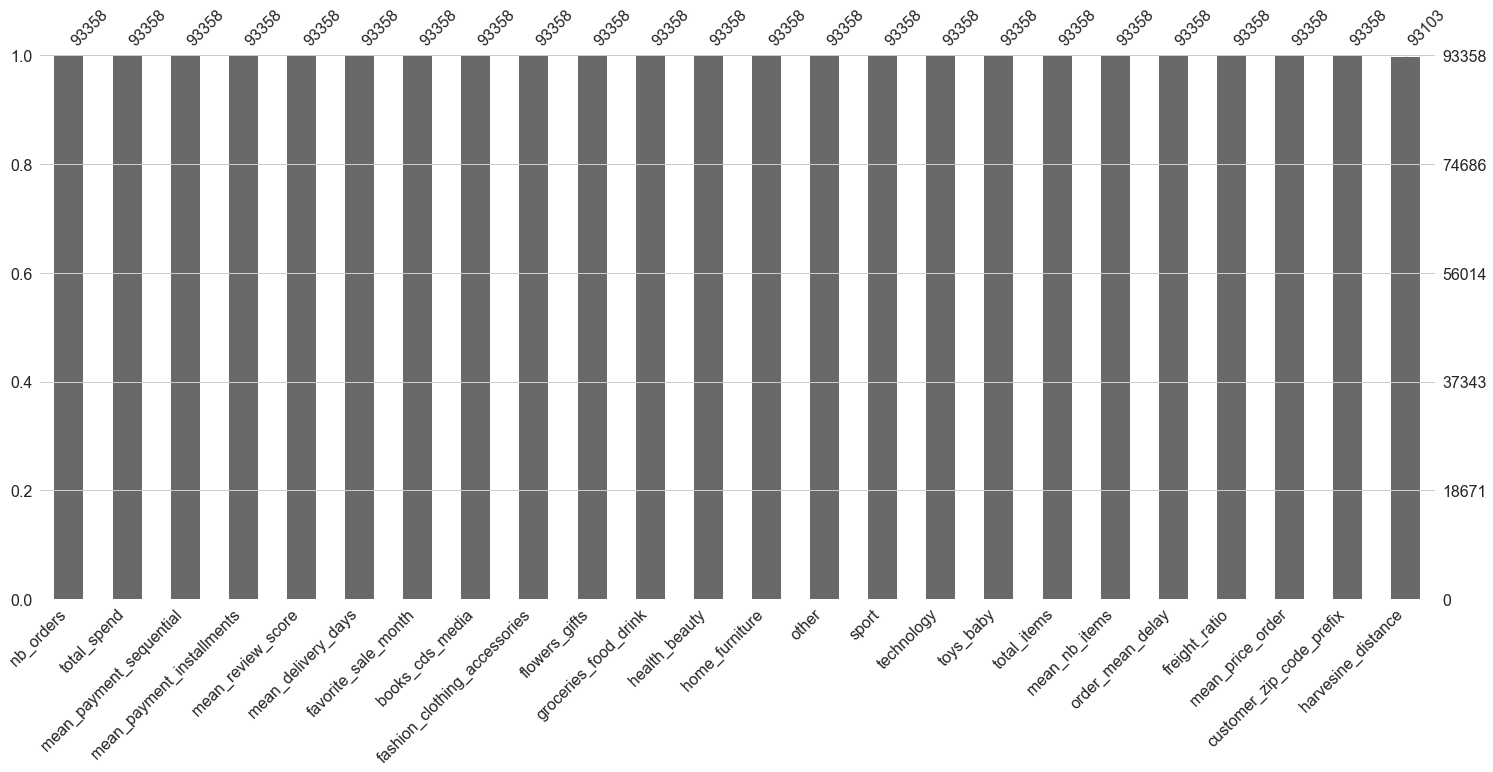

In [14]:
msn.bar(df_seg)

### III.Ségmentation avec l'algorithme du K-Means 

### III.1.Pré-processing 

In [15]:
df_seg.drop(["customer_zip_code_prefix",
           "mean_price_order",
           "mean_nb_items"], axis=1, inplace=True)

In [16]:
#df_seg.drop(["customer_zip_code_prefix", "mean_price_order", "mean_nb_items"], axis = 1, inplace = True)

In [17]:
categorical_features = list(df_seg.select_dtypes(exclude=['int64', 'float64', 'uint8']).columns)
categorical_features

[]

In [18]:
numerical_features = list(df_seg.select_dtypes(include=['int64','float64', 'uint8']).columns)
numerical_features

['nb_orders',
 'total_spend',
 'mean_payment_sequential',
 'mean_payment_installments',
 'mean_review_score',
 'mean_delivery_days',
 'favorite_sale_month',
 'books_cds_media',
 'fashion_clothing_accessories',
 'flowers_gifts',
 'groceries_food_drink',
 'health_beauty',
 'home_furniture',
 'other',
 'sport',
 'technology',
 'toys_baby',
 'total_items',
 'order_mean_delay',
 'freight_ratio',
 'harvesine_distance']

In [19]:
features_to_fill = df_seg.isnull().sum()
features_to_fill = list(features_to_fill[features_to_fill.values > 0].index)

for f in features_to_fill:
    df_seg[f] = df_seg[f].fillna(df_seg[f].mode()[0])
    print(f, df_seg[f].mode()[0])

harvesine_distance 403.00091285900976


In [20]:
scaler = MinMaxScaler()

preprocessor = ColumnTransformer([('scaler', scaler, numerical_features)])

### III.2.Détermination du meilleur K par la méthode du coude 

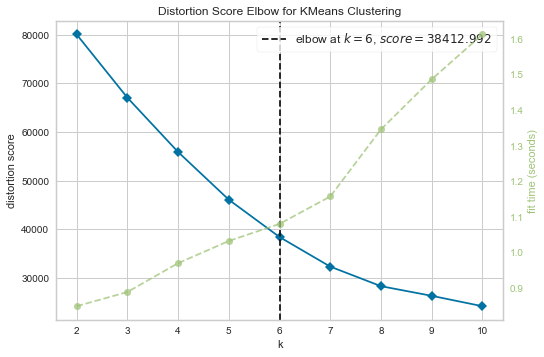

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [21]:
X = df_seg.copy()

#Méthode de Elbow
kmeans_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("kelbowvisualizer", KElbowVisualizer(KMeans(),K=(4,12)))])
kmeans_visualizer.fit(X)
kmeans_visualizer.named_steps['kelbowvisualizer'].show()

### III.3.Coefficient de silhouette 

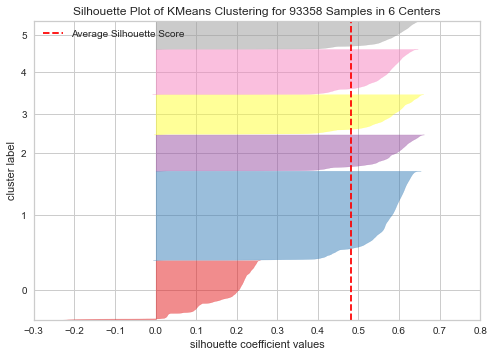

<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 93358 Samples in 6 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [22]:
#Nous prenons le meilleur k déterminé par la méthode Elbow
K = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_

#Silhouette Visualizer
silhouette_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("silhouettevisualizer", SilhouetteVisualizer(KMeans(K)))])
silhouette_visualizer.fit(X)
silhouette_visualizer.named_steps['silhouettevisualizer'].show()

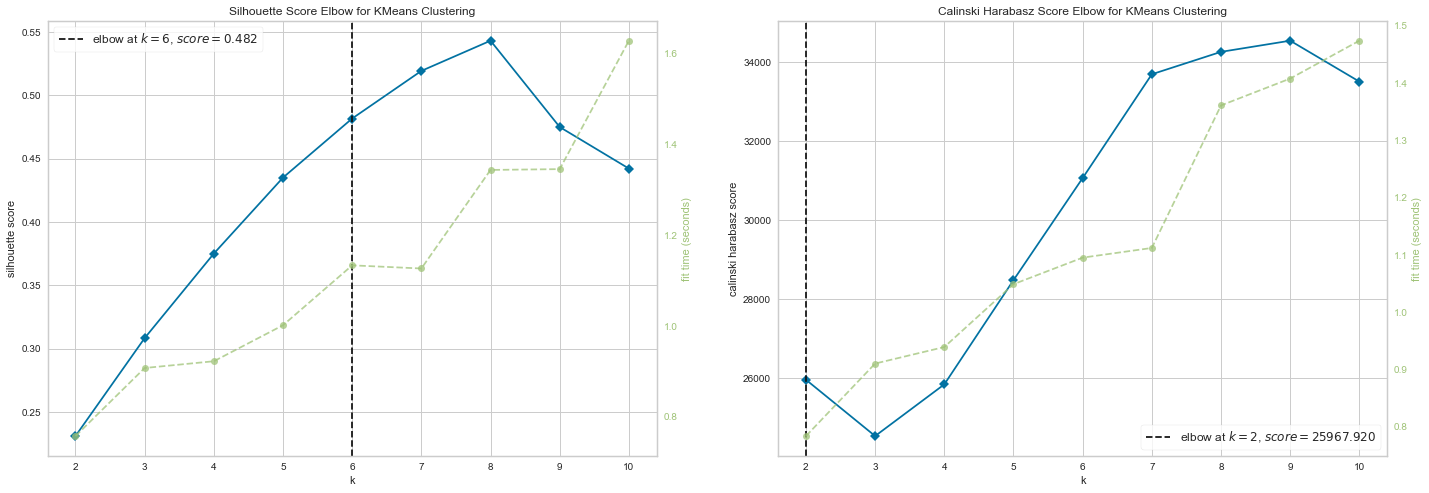

In [23]:
#Méthode Elbow avec différentes métriques
metrics = ["silhouette", "calinski_harabasz"]
i = 0

fig, axes = plt.subplots(nrows = 1, ncols = 2, sharex = False, sharey = False, figsize = (24, 8))
for m in metrics:
    kmeans_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("kelbowvisualizer", KElbowVisualizer(KMeans(),
                                              K = (4,10),
                                              metric = m,
                                              ax = axes[i]))])
    kmeans_visualizer.fit(X)
    kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
    i += 1

plt.show()

### III.4.Distances intercluster 

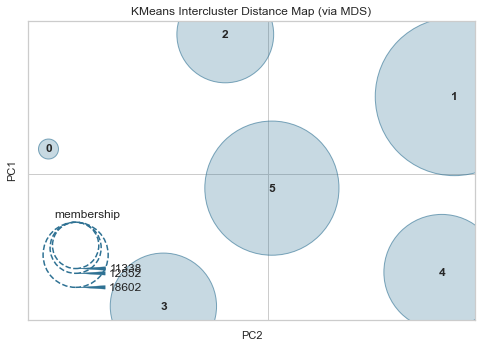

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [24]:
#Distance inter-groupes avec le meilleur K 
distance_visualizer = Pipeline([
    ("preprocessor", preprocessor),
    ("distancevisualizer", InterclusterDistance(KMeans(K)))])
distance_visualizer.fit(X)
distance_visualizer.named_steps['distancevisualizer'].show()

### III.5.Analyse des différents clusters 

In [25]:
#Pipline des KMeans avec le meilleur K 
kmeans_model = Pipeline([("preprocessor", preprocessor),
                         ("kmeans", KMeans(K))])
kmeans_model.fit(X)

#Label Kmeans
kmeans_labels = kmeans_model.named_steps['kmeans'].labels_
df_seg["kmeans_label"] = kmeans_labels

In [26]:
kmeans_clusters_means = df_seg.groupby("kmeans_label").mean().reset_index()
kmeans_clusters_means

kmeans_label  nb_orders  total_spend  mean_payment_sequential  \
0             0   1.029811   163.668632                 1.034302   
1             1   1.021308   145.879710                 1.036304   
2             2   1.040323   163.705305                 1.055700   
3             3   1.030513   178.882372                 1.041527   
4             4   1.022637   221.318787                 1.041728   
5             5   1.041501   147.137806                 1.040274   

   mean_payment_installments  mean_review_score  mean_delivery_days  \
0                   3.146623           4.247431           12.030517   
1                   2.258613           4.096048           13.083712   
2                   3.288987           4.084087           12.976984   
3                   2.842656           4.182801           12.152638   
4                   3.634610           4.173685           12.645891   
5                   2.674817           4.241487           11.913769   

   favorite_sale_month  books_cds_media  fashion_clothing_accessories  ...  \
0             6.065355         0.000176                      0.000588  ...   
1             5.696942         0.000035                      0.000675  ...   
2             6.048016         0.000137                      0.000702  ...   
3             5.862970         0.000199                      0.001175  ...   
4             6.268001         0.000114                      0.000796  ...   
5             6.258413         0.045067                      0.167954  ...   

   health_beauty  home_furniture     other     sport  technology  toys_baby  \
0       0.993211        0.002889  0.000498  0.000098    0.001191   0.000081   
1       0.000348        0.001643  0.000306  0.000018    0.996158   0.000130   
2       0.000546        0.994194  0.001358  0.000176    0.001414   0.000546   
3       0.001800        0.005458  0.987075  0.000127    0.002154   0.000651   
4       0.000701        0.002692  0.000781  0.000061    0.001687   0.000364   
5       0.001749        0.004087  0.001989  0.386118    0.001449   0.341960   

   total_items  order_mean_delay  freight_ratio  harvesine_distance  
0     1.128065        222.056899       0.188519          472.855461  
1     1.152768        236.630203       0.259982          480.791594  
2     1.276790        237.017017       0.216113          409.353002  
3     1.155593        211.022533       0.204121          445.799089  
4     1.086452        234.508598       0.140067          491.574563  
5     1.149446        242.495191       0.203638          439.989546  

[6 rows x 22 columns]

In [27]:
X_scaled = preprocessor.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, index = X.index, columns = X.columns)
X_scaled["kmeans_label"] = kmeans_labels
X_scaled_clusters = X_scaled.groupby("kmeans_label").mean()
X_scaled_clusters

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label                                                    
0              0.002129     0.011284                 0.001372   
1              0.001522     0.009981                 0.001452   
2              0.002880     0.011287                 0.002228   
3              0.002180     0.012398                 0.001661   
4              0.001617     0.015506                 0.001669   
5              0.002964     0.010073                 0.001611   

              mean_payment_installments  mean_review_score  \
kmeans_label                                                 
0                              0.121024           0.811858   
1                              0.086870           0.774012   
2                              0.126500           0.771022   
3                              0.109333           0.795700   
4                              0.139793           0.793421   
5                              0.102878           0.810372   

              mean_delivery_days  favorite_sale_month  books_cds_media  \
kmeans_label                                                             
0                       0.052778             0.460487         0.000176   
1                       0.057817             0.426995         0.000035   
2                       0.057306             0.458911         0.000137   
3                       0.053362             0.442088         0.000199   
4                       0.055722             0.478909         0.000114   
5                       0.052219             0.478038         0.045067   

              fashion_clothing_accessories  flowers_gifts  ...  health_beauty  \
kmeans_label                                               ...                  
0                                 0.000588       0.000661  ...       0.993211   
1                                 0.000675       0.000463  ...       0.000348   
2                                 0.000702       0.000768  ...       0.000546   
3                                 0.001175       0.001246  ...       0.001800   
4                                 0.000796       0.992781  ...       0.000701   
5                                 0.167954       0.001906  ...       0.001749   

              home_furniture     other     sport  technology  toys_baby  \
kmeans_label                                                              
0                   0.002889  0.000498  0.000098    0.001191   0.000081   
1                   0.001643  0.000306  0.000018    0.996158   0.000130   
2                   0.994194  0.001358  0.000176    0.001414   0.000546   
3                   0.005458  0.987075  0.000127    0.002154   0.000651   
4                   0.002692  0.000781  0.000061    0.001687   0.000364   
5                   0.004087  0.001989  0.386118    0.001449   0.341960   

              total_items  order_mean_delay  freight_ratio  harvesine_distance  
kmeans_label                                                                    
0                0.005568          0.311440       0.196374            0.088523  
1                0.006642          0.331880       0.270815            0.090011  
2                0.012034          0.332422       0.225118            0.076623  
3                0.006765          0.295964       0.212626            0.083453  
4                0.003759          0.328904       0.145903            0.092031  
5                0.006498          0.340105       0.212123            0.082364  

[6 rows x 21 columns]

In [28]:
def plot_radars(data, group):

    scaler = MinMaxScaler()
    data = pd.DataFrame(scaler.fit_transform(data), 
                        index = data.index,
                        columns = data.columns).reset_index()
    
    fig = go.Figure()

    for k in data[group]:
        fig.add_trace(go.Scatterpolar(
            r = data[data[group] == k].iloc[:,1:].values.reshape(-1),
            theta = data.columns[1:],
            fill = 'toself',
            name = 'Cluster ' + str(k)
        ))

    fig.update_layout(
        polar = dict(
        radialaxis = dict(
          visible = True,
          range = [0, 1]
        )),
        showlegend = True,
        title={
            'text': "Comparaison des moyennes par variable des clusters",
            'y':0.95,
            'x':0.5,
            'xanchor': 'center',
            'yanchor': 'top'},
        title_font_color = "blue",
        title_font_size = 18)

    fig.show()

In [29]:
plot_radars(data = X_scaled_clusters, group = "kmeans_label")

### III.6.Clustering sans les catégories produits 

In [30]:
categories_col = ['books_cds_media',
                  'fashion_clothing_accessories',
                  'flowers_gifts',
                  'groceries_food_drink',
                  'health_beauty',
                  'home_furniture',
                  'other',
                  'sport',
                  'technology',
                  'toys_baby']
X_bis = X.drop(categories_col, axis=1)

X_bis.head(5)

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2        1.0       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f        1.0        27.19   
0000f46a3911fa3c0805444483337064        1.0        86.22   
0000f6ccb0745a6a4b88665a16c9f078        1.0        43.62   
0004aac84e0df4da2b147fca70cf8255        1.0       196.89   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000366f3b9a7992bf8c76cfdf3221e2                      1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                      1.0   
0000f46a3911fa3c0805444483337064                      1.0   
0000f6ccb0745a6a4b88665a16c9f078                      1.0   
0004aac84e0df4da2b147fca70cf8255                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000366f3b9a7992bf8c76cfdf3221e2                        8.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                        1.0   
0000f46a3911fa3c0805444483337064                        8.0   
0000f6ccb0745a6a4b88665a16c9f078                        4.0   
0004aac84e0df4da2b147fca70cf8255                        6.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2                5.0                 6.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                4.0                 3.0   
0000f46a3911fa3c0805444483337064                3.0                26.0   
0000f6ccb0745a6a4b88665a16c9f078                4.0                20.0   
0004aac84e0df4da2b147fca70cf8255                5.0                13.0   

                                  favorite_sale_month  total_items  \
customer_unique_id                                                   
0000366f3b9a7992bf8c76cfdf3221e2                  5.0          1.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                  5.0          1.0   
0000f46a3911fa3c0805444483337064                  3.0          1.0   
0000f6ccb0745a6a4b88665a16c9f078                 10.0          1.0   
0004aac84e0df4da2b147fca70cf8255                 11.0          1.0   

                                  order_mean_delay  freight_ratio  \
customer_unique_id                                                  
0000366f3b9a7992bf8c76cfdf3221e2             111.0           0.08   
0000b849f77a49e4a4ce2b2a4ca5be3f             114.0           0.30   
0000f46a3911fa3c0805444483337064             537.0           0.20   
0000f6ccb0745a6a4b88665a16c9f078             321.0           0.40   
0004aac84e0df4da2b147fca70cf8255             288.0           0.09   

                                  harvesine_distance  
customer_unique_id                                    
0000366f3b9a7992bf8c76cfdf3221e2          211.643700  
0000b849f77a49e4a4ce2b2a4ca5be3f          203.596133  
0000f46a3911fa3c0805444483337064          151.425763  
0000f6ccb0745a6a4b88665a16c9f078         1666.119961  
0004aac84e0df4da2b147fca70cf8255          175.436120

In [31]:
def clustering_eval(preprocessor, model, data, metric, elbow = True, mds = False, KBest = None):
    
    if((elbow == True) & (mds == True)):
        ncols = 3
    elif((elbow == False) | (mds == False)):
        ncols = 2
    else:
        ncols = 1
        
    fig, axes = plt.subplots(nrows = 1, ncols = ncols, sharex = False, sharey = False, figsize = (24,8))
    
    ax = 0
    if(elbow == True):
        # Elbow visualizer
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,K = (4, 12), metric=metric, ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax += 1
    
    #Etablir meilleur k
    K = KBest
    model.set_params(n_clusters=K)

    #Silhouette Visualizer
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax = axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax += 1
    
    #Distance inter-groupe avec meilleur k
    if(mds== True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax = axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
    
    return K
    
    plt.show()

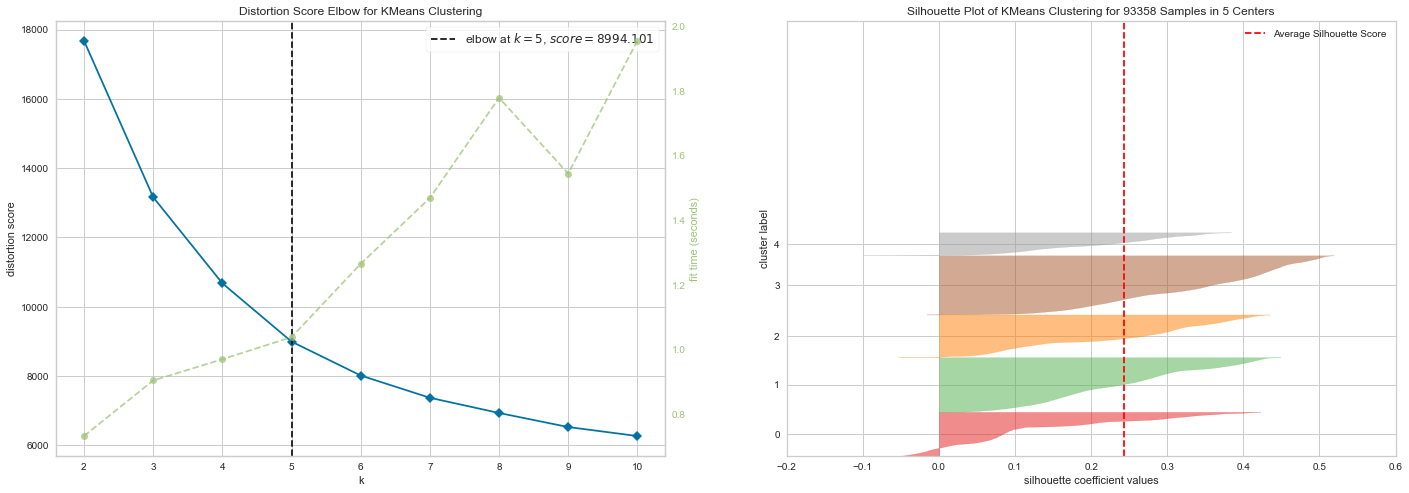

In [32]:
K = clustering_eval(preprocessor = MinMaxScaler(), 
                model = KMeans(), 
                data = X_bis, 
                metric = "distortion",
                elbow = True,
                mds = False,
                KBest = None)

In [33]:
#Pipeline de K-Means avec le meilleur K 
kmeans_model_bis = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_bis.fit(X_bis)

#Label Kmeans
kmeans_labels_bis = kmeans_model_bis.named_steps['kmeans'].labels_

#Scale X
scaler = MinMaxScaler()
X_scaled_bis = scaler.fit_transform(X_bis)
X_scaled_bis = pd.DataFrame(X_scaled_bis, index=X_bis.index, columns=X_bis.columns)
X_scaled_bis["kmeans_label"] = kmeans_labels_bis

#Group by cluster
X_scaled_clusters_bis = X_scaled_bis.groupby("kmeans_label").mean()

#Plot Radar chart
plot_radars(data = X_scaled_clusters_bis, group = "kmeans_label")

### III.7.Clustering avec les variables RFM uniquement

In [34]:
rfm_col = ['mean_payment_sequential', 'mean_payment_installments', 'mean_review_score', 'mean_delivery_days', 'favorite_sale_month', 'books_cds_media',
                  'fashion_clothing_accessories',
                  'flowers_gifts',
                  'groceries_food_drink',
                  'health_beauty',
                  'home_furniture',
                  'other',
                  'sport',
                  'technology',
                  'toys_baby', 'total_items', 'freight_ratio', 'harvesine_distance']
X_ter = X.drop(rfm_col, axis=1)

X_ter.head(5)

nb_orders  total_spend  order_mean_delay
customer_unique_id                                                        
0000366f3b9a7992bf8c76cfdf3221e2        1.0       141.90             111.0
0000b849f77a49e4a4ce2b2a4ca5be3f        1.0        27.19             114.0
0000f46a3911fa3c0805444483337064        1.0        86.22             537.0
0000f6ccb0745a6a4b88665a16c9f078        1.0        43.62             321.0
0004aac84e0df4da2b147fca70cf8255        1.0       196.89             288.0

In [35]:
def clustering_eval(preprocessor, model, data, metric, elbow = True, mds = False, KBest = None):
    
    if((elbow == True) & (mds == True)):
        ncols = 3
    elif((elbow == False) | (mds == False)):
        ncols = 2
    else:
        ncols = 1
        
    fig, axes = plt.subplots(nrows = 1, ncols = ncols, sharex = False, sharey = False, figsize = (24,8))
    
    ax = 0
    if(elbow == True):
        # Elbow visualizer
        kmeans_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("kelbowvisualizer", KElbowVisualizer(model,K = (4, 12), metric=metric, ax=axes[ax]))])
        kmeans_visualizer.fit(data)
        KBest = kmeans_visualizer.named_steps['kelbowvisualizer'].elbow_value_
        kmeans_visualizer.named_steps['kelbowvisualizer'].finalize()
        ax += 1
    
    #Etablir meilleur k
    K = KBest
    model.set_params(n_clusters=K)

    #Silhouette Visualizer
    silhouette_visualizer = Pipeline([
        ("preprocessor", preprocessor),
        ("silhouettevisualizer", SilhouetteVisualizer(model, ax = axes[ax]))])
    silhouette_visualizer.fit(data)
    silhouette_visualizer.named_steps['silhouettevisualizer'].finalize()
    ax += 1
    
    #Distance inter-groupe avec meilleur k
    if(mds== True):
        distance_visualizer = Pipeline([
            ("preprocessor", preprocessor),
            ("distancevisualizer", InterclusterDistance(model, ax = axes[ax]))])
        distance_visualizer.fit(data)
        distance_visualizer.named_steps['distancevisualizer'].finalize()
    
    return K
    
    plt.show()

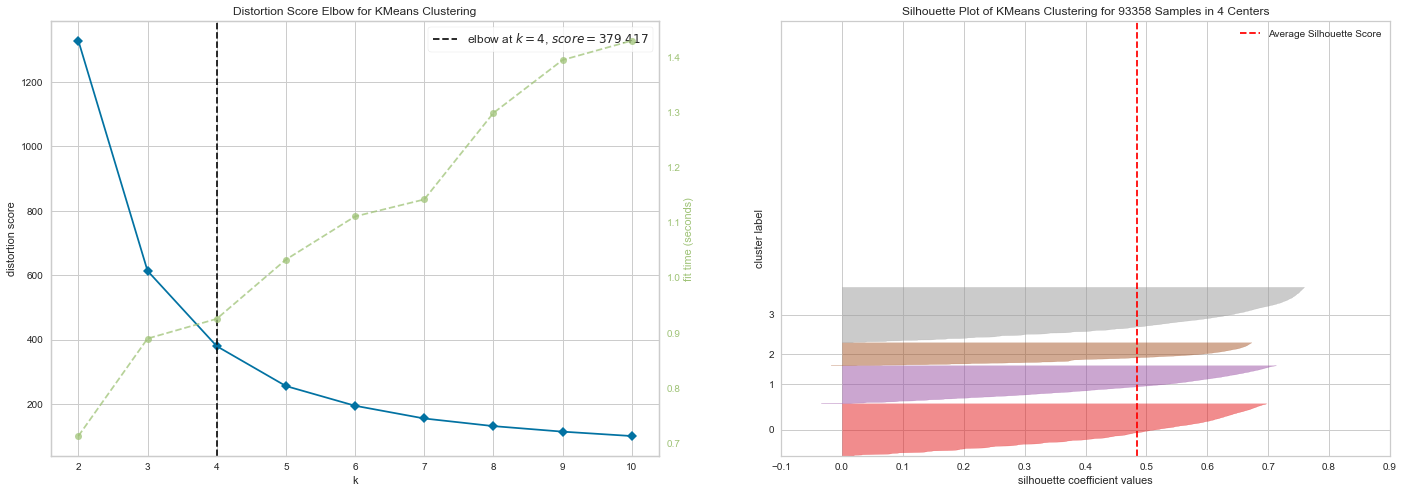

In [36]:
K = clustering_eval(preprocessor = MinMaxScaler(), 
                model = KMeans(), 
                data = X_ter, 
                metric = "distortion",
                elbow = True,
                mds = False,
                KBest = None)

In [37]:
#Pipeline de K-Means avec le meilleur K 
kmeans_model_ter = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_ter.fit(X_ter)

#Label Kmeans
kmeans_labels_ter = kmeans_model_ter.named_steps['kmeans'].labels_

#Scale X
scaler = MinMaxScaler()
X_scaled_ter = scaler.fit_transform(X_ter)
X_scaled_ter = pd.DataFrame(X_scaled_ter, index=X_ter.index, columns=X_ter.columns)
X_scaled_ter["kmeans_label"] = kmeans_labels_ter

#Group by cluster
X_scaled_clusters_ter = X_scaled_ter.groupby("kmeans_label").mean()

#Plot Radar chart
plot_radars(data = X_scaled_clusters_ter, group = "kmeans_label")

### IV.Réduction dimensionnelle - PCA 

In [38]:
#PCA Pipeline
pca = Pipeline([("preprocessor", MinMaxScaler()),
                ("pca", PCA(svd_solver = 'full'))])
pca.fit(X_bis)
X_projected = pca.transform(X_bis)

### IV.1.Eboulis des valeurs propres

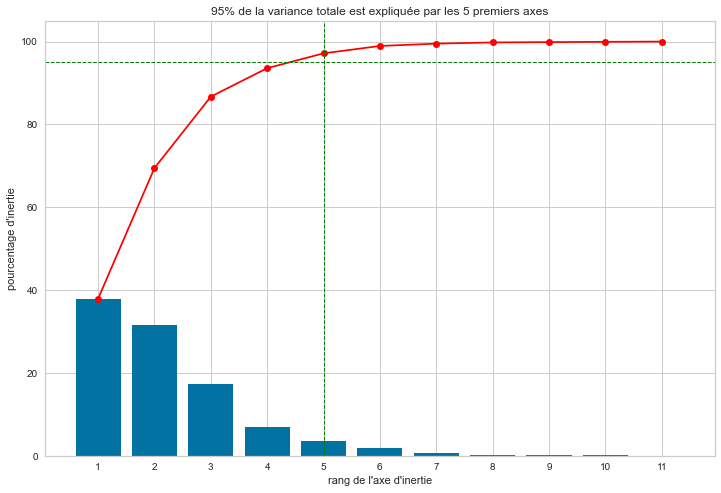

In [39]:
#Variance expliquée
varexpl = pca.named_steps['pca'].explained_variance_ratio_*100

#Plot de la variance cumulée
plt.figure(figsize = (12,8))
plt.bar(np.arange(len(varexpl))+1, varexpl)

cumSumVar = varexpl.cumsum()
plt.plot(np.arange(len(varexpl))+1, cumSumVar,c = "red",marker = 'o')
plt.axhline(y = 95, linestyle = "--", 
            color = "green",
            linewidth = 1)

limit = 95
valid_idx = np.where(cumSumVar >= limit)[0]
min_plans = valid_idx[cumSumVar[valid_idx].argmin()]+1
plt.axvline(x = min_plans, linestyle = "--", 
            color = "green",
            linewidth = 1)

plt.xlabel("rang de l'axe d'inertie")
plt.xticks(np.arange(len(varexpl))+1)
plt.ylabel("pourcentage d'inertie")
plt.title("{}% de la variance totale est expliquée par les {} premiers axes".format(limit, min_plans))

plt.show(block = False)

### IV.2.Cercle des corrélations

In [36]:
def cerle_corr(pcs, n_comp, pca, axis_ranks, 
               labels = None, label_rotation = 0):
    
    fig = plt.figure(figsize = (20, n_comp*5))
    count = 1
    for d1, d2 in axis_ranks:
        if d2 < n_comp:
            
            #Initialisation de la figure
            #fig.subplots_adjust(left=0.1,right=0.9,bottom=0.1,top=0.9)
            ax = plt.subplot(int(n_comp/2), 2, count)
            ax.set_aspect('equal', adjustable = 'box') 
            
            #Détermination des limites du graphique
            ax.set_xlim(-1, 1) 
            ax.set_ylim(-1, 1) 

            #Affichage des flèches 
            ax.quiver(np.zeros(pcs.shape[1]), np.zeros(pcs.shape[1]),
                       pcs[d1,:],pcs[d2,:], 
                       angles = 'xy', scale_units= 'xy', scale = 1, 
                       color = "grey", alpha = 0.5)
            
            #Noms de variables
            for i,(x,y) in enumerate(pcs[[d1,d2]].T):
                ax.annotate(labels[i],(x,y),
                             ha = 'center', va = 'center',
                             fontsize = '14',color = "#17aafa", alpha = 0.8) 

            #Ajouter les axes 
            ax.plot([-1, 1],[0, 0],linewidth = 1, color = 'grey', ls = '--') 
            ax.plot([0, 0],[-1, 1],linewidth = 1, color = 'grey', ls = '--')
            
            #Ajouter un cercle 
            cercle = plt.Circle((0, 0), 1, color = '#17aafa',fill = False) 
            ax.add_artist(cercle) 

            #Nom des axes, avec le pourcentage d'inertie expliqué
            ax.set_xlabel('F{} ({}%)'.format(d1+1, round(100*pca.explained_variance_ratio_[d1], 1)))
            ax.set_ylabel('F{} ({}%)'.format(d2+1, round(100*pca.explained_variance_ratio_[d2], 1)))

            ax.set_title("Cercle des corrélations (F{} et F{})".format(d1+1, d2+1))
            count += 1
            
    plt.suptitle("Cercles des corrélations sur les {} premiers axes".format(n_comp), y = .9, color = "blue", fontsize = 18)
    
    plt.show(block = False)

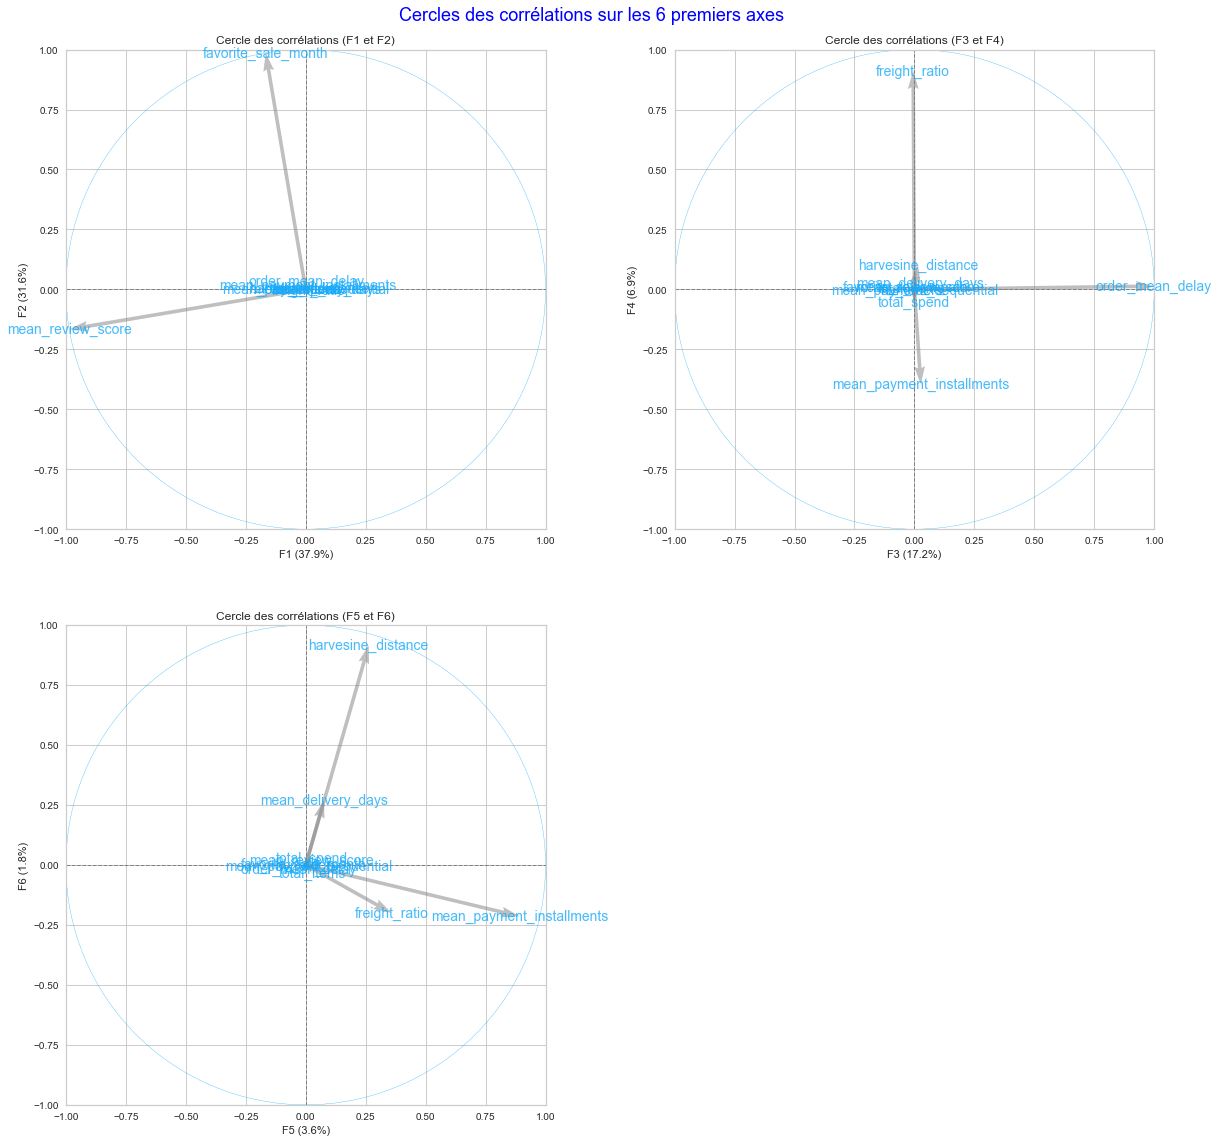

In [37]:
#Composante espace principale
pcs = pca.named_steps['pca'].components_

#Plot du cercle de corrélation
cerle_corr(pcs,
           6,
           pca.named_steps['pca'],
           [(0,1),(2,3),(4,5)],
           labels = np.array(X_bis.columns))

### V.K-Means après réduction de dimensions

In [38]:
#Pipeline du K-Means avec la meilleur valeur de K pour les résultats du PCA
kmeans_model_pca = Pipeline([("preprocessor", MinMaxScaler()),
                             ("kmeans", KMeans(K))])
kmeans_model_pca.fit(X_projected[:,:4])

#Label de K-means
pca_kmeans_labels = kmeans_model_pca.named_steps['kmeans'].labels_
X_scaled_bis["kmeans_label_pca"] = pca_kmeans_labels
X_scaled_clusters_pca = X_scaled_bis.groupby("kmeans_label_pca").mean()
X_scaled_clusters_pca.iloc[:,:-1]

nb_orders  total_spend  mean_payment_sequential  \
kmeans_label_pca                                                    
0                  0.001875     0.013415                 0.001886   
1                  0.000705     0.010823                 0.001716   
2                  0.005406     0.011798                 0.001478   
3                  0.002686     0.010785                 0.001594   
4                  0.000000     0.010870                 0.002376   

                  mean_payment_installments  mean_review_score  \
kmeans_label_pca                                                 
0                                  0.123970           0.062388   
1                                  0.116360           0.894071   
2                                  0.110207           0.905742   
3                                  0.104815           0.887961   
4                                  0.122871           0.892456   

                  mean_delivery_days  favorite_sale_month  total_items  \
kmeans_label_pca                                                         
0                           0.091840             0.437829     0.015241   
1                           0.053822             0.837004     0.005546   
2                           0.038547             0.504224     0.009102   
3                           0.056187             0.136168     0.006703   
4                           0.052205             0.347671     0.004930   

                  order_mean_delay  freight_ratio  harvesine_distance  
kmeans_label_pca                                                       
0                         0.324342       0.222188            0.092330  
1                         0.433158       0.211567            0.084796  
2                         0.083326       0.219753            0.079612  
3                         0.247324       0.214398            0.080381  
4                         0.673512       0.218938            0.086066

In [39]:
plot_radars(data = X_scaled_clusters_pca.iloc[:,:-1], group = "kmeans_label_pca")

5

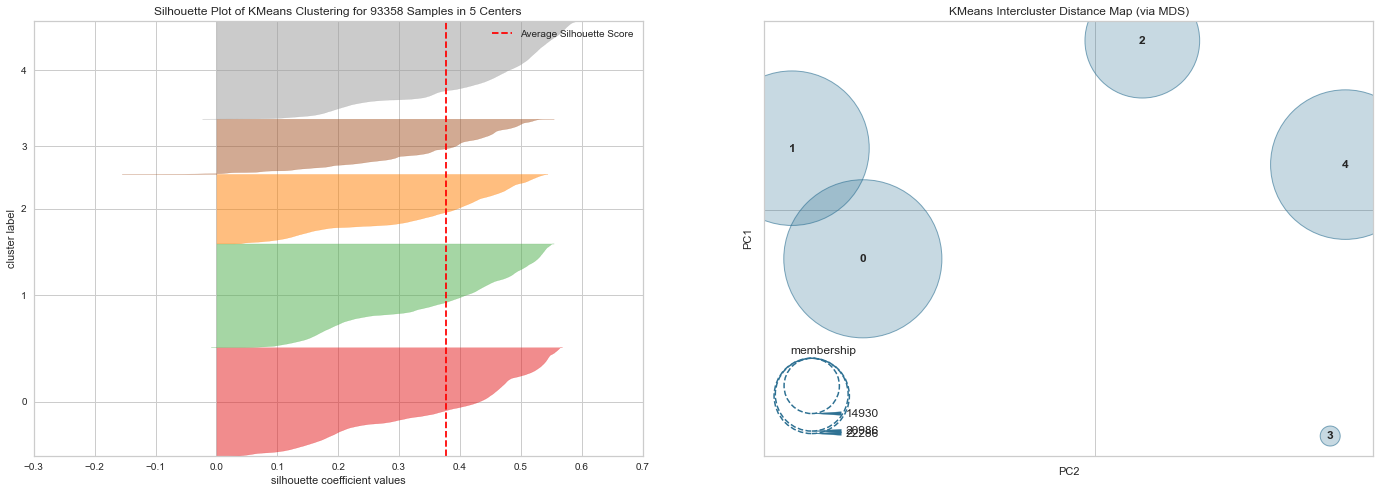

In [40]:
clustering_eval(preprocessor = MinMaxScaler(), 
                model = KMeans(), 
                data = X_projected[:,:4], 
                metric = "distortion",
                elbow = False,
                mds = True,
                KBest = K)

### VI.Stabilité à l'initialisation du K-Means 

In [41]:
labels = pca_kmeans_labels
pca_data = X_projected[:,:4]

In [42]:
def bench_k_means(model, name, data, labels):
    t0 = time()
    estimator = make_pipeline(MinMaxScaler(), model).fit(data)
    fit_time = time() - t0
    results = [name, fit_time, estimator[1].inertia_]
    
    #Tester differents metriques parmi les labels de precdiction
    clustering_metrics = [
        homogeneity_score,
        adjusted_rand_score,
        adjusted_mutual_info_score]
    results += [m(labels, estimator[1].labels_) for m in clustering_metrics]
    
    #Afficher les résultats
    formatter_result = ("{:9s}\t{:.3f}s\t{:.0f}\t{:.3f}"
                        "\t{:.3f}\t{:.3f}")
    print(formatter_result.format(*results))

In [43]:
print("Scores de stabilité à l'initialisation")
print(53 * '_')
print('Iteration\tFitTime\tInertia\tHomo\tARI\tAMI')
print(53 * '_')

for i in range(10):
    imodel = KMeans(n_clusters=K, n_init=1, init = "k-means++")
    bench_k_means(model = imodel, name = "Iter "+str(i), 
                  data = pca_data, labels = labels)

print(53 * '_')

Scores de stabilité à l'initialisation
_____________________________________________________
Iteration	FitTime	Inertia	Homo	ARI	AMI
_____________________________________________________
Iter 0   	0.158s	6460	0.634	0.534	0.650
Iter 1   	0.103s	5373	1.000	1.000	1.000
Iter 2   	0.098s	6428	0.666	0.579	0.677
Iter 3   	0.100s	5373	1.000	1.000	1.000
Iter 4   	0.106s	6107	0.616	0.564	0.632
Iter 5   	0.101s	5373	1.000	1.000	1.000
Iter 6   	0.104s	5373	1.000	1.000	1.000
Iter 7   	0.094s	5373	1.000	1.000	1.000
Iter 8   	0.102s	5373	1.000	1.000	1.000
Iter 9   	0.101s	5373	1.000	1.000	1.000
_____________________________________________________


### VII.Clustering avec l'algorithme du K-Prototypes 

In [44]:
X_ter = X.iloc[:,:-1]
X_ter["favorite_sale_month"] = pd.to_datetime(X_ter["favorite_sale_month"], format='%m').dt.month_name()
X_ter["mean_payment_sequential"] = np.where(X_ter["mean_payment_sequential"] > 1, "Multiple", "Single")
X_ter["mean_payment_installments"] = np.where(X_ter["mean_payment_installments"] > 1, "Multiple", "Single")

X_ter.head(5)

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1186147931.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1186147931.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1186147931.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

nb_orders  total_spend  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2        1.0       141.90   
0000b849f77a49e4a4ce2b2a4ca5be3f        1.0        27.19   
0000f46a3911fa3c0805444483337064        1.0        86.22   
0000f6ccb0745a6a4b88665a16c9f078        1.0        43.62   
0004aac84e0df4da2b147fca70cf8255        1.0       196.89   

                                 mean_payment_sequential  \
customer_unique_id                                         
0000366f3b9a7992bf8c76cfdf3221e2                  Single   
0000b849f77a49e4a4ce2b2a4ca5be3f                  Single   
0000f46a3911fa3c0805444483337064                  Single   
0000f6ccb0745a6a4b88665a16c9f078                  Single   
0004aac84e0df4da2b147fca70cf8255                  Single   

                                 mean_payment_installments  mean_review_score  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                  Multiple                5.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                    Single                4.0   
0000f46a3911fa3c0805444483337064                  Multiple                3.0   
0000f6ccb0745a6a4b88665a16c9f078                  Multiple                4.0   
0004aac84e0df4da2b147fca70cf8255                  Multiple                5.0   

                                  mean_delivery_days favorite_sale_month  \
customer_unique_id                                                         
0000366f3b9a7992bf8c76cfdf3221e2                 6.0                 May   
0000b849f77a49e4a4ce2b2a4ca5be3f                 3.0                 May   
0000f46a3911fa3c0805444483337064                26.0               March   
0000f6ccb0745a6a4b88665a16c9f078                20.0             October   
0004aac84e0df4da2b147fca70cf8255                13.0            November   

                                  books_cds_media  \
customer_unique_id                                  
0000366f3b9a7992bf8c76cfdf3221e2              0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f              0.0   
0000f46a3911fa3c0805444483337064              0.0   
0000f6ccb0745a6a4b88665a16c9f078              0.0   
0004aac84e0df4da2b147fca70cf8255              0.0   

                                  fashion_clothing_accessories  flowers_gifts  \
customer_unique_id                                                              
0000366f3b9a7992bf8c76cfdf3221e2                           0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                           0.0            0.0   
0000f46a3911fa3c0805444483337064                           0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                           0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                           0.0            0.0   

                                  groceries_food_drink  health_beauty  \
customer_unique_id                                                      
0000366f3b9a7992bf8c76cfdf3221e2                   0.0            0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f                   0.0            1.0   
0000f46a3911fa3c0805444483337064                   0.0            0.0   
0000f6ccb0745a6a4b88665a16c9f078                   0.0            0.0   
0004aac84e0df4da2b147fca70cf8255                   0.0            0.0   

                                  home_furniture  other  sport  technology  \
customer_unique_id                                                           
0000366f3b9a7992bf8c76cfdf3221e2             1.0    0.0    0.0         0.0   
0000b849f77a49e4a4ce2b2a4ca5be3f             0.0    0.0    0.0         0.0   
0000f46a3911fa3c0805444483337064             0.0    1.0    0.0         0.0   
0000f6ccb0745a6a4b88665a16c9f078             0.0    0.0    0.0         1.0   
0004aac84e0df4da2b147fca70cf8255             0.0    0.0    0.0         1.0   

                                  toys_baby  total_items  order_mean_delay  \
customer_uniqu

In [45]:
for c in X_ter.select_dtypes(exclude="object").columns:
    scaler = MinMaxScaler()
    X_ter[c] = scaler.fit_transform(np.array(X_ter[c]).reshape(-1, 1))

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1081747746.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1081747746.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

C:\Users\archi\AppData\Local\Temp/ipykernel_10928/1081747746.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [46]:
#Indexe de variables categorielles
cat_cols = [X_ter.columns.get_loc(c) for c in X_ter.select_dtypes(include = "object").columns]

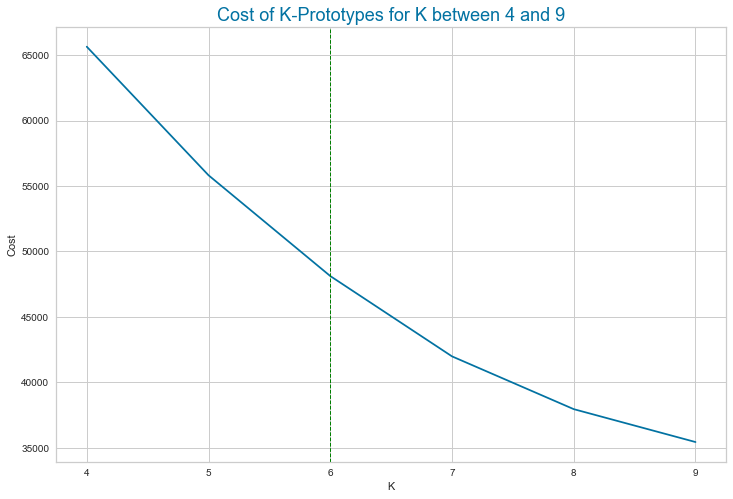

In [47]:
#Choix du K optimal
cost = []
for num_clusters in list(range(4, 10)):
    kproto = KPrototypes(n_clusters = num_clusters, init = 'Cao')
    kproto.fit_predict(X_ter, categorical = cat_cols)
    cost.append(kproto.cost_)

plt.figure(figsize = (12, 8))
plt.plot(cost)
plt.xticks(np.arange(0, 6, 1), np.arange(4, 10, 1))
plt.axvline(x = 2, linestyle = "--", color = "green", linewidth = 1)

plt.xlabel("K")
plt.ylabel("Cost")

plt.title("Cost of K-Prototypes for K between 4 and 9", fontsize = 18, color = "b")

plt.show()

In [48]:
kproto = KPrototypes(n_clusters = 6, init = 'Cao')
kproto_labels = kproto.fit_predict(X_ter, categorical = cat_cols)

In [49]:
X_ter["kproto_labels"] = kproto_labels
X_ter.groupby("kproto_labels").mean()

nb_orders  total_spend  mean_review_score  mean_delivery_days  \
kproto_labels                                                                  
0               0.002164     0.011284           0.811198            0.052728   
1               0.001867     0.015537           0.793070            0.055677   
2               0.002240     0.012402           0.795462            0.053384   
3               0.002458     0.009977           0.810859            0.052228   
4               0.001571     0.009984           0.774112            0.057806   
5               0.003073     0.011323           0.771309            0.057305   

               books_cds_media  fashion_clothing_accessories  flowers_gifts  \
kproto_labels                                                                 
0                     0.000176                      0.000528       0.000572   
1                     0.000057                      0.000867       0.990141   
2                     0.000199                      0.001187       0.001113   
3                     0.045488                      0.169612       0.000758   
4                     0.000035                      0.000674       0.000427   
5                     0.000161                      0.000658       0.000814   

               groceries_food_drink  health_beauty  home_furniture     other  \
kproto_labels                                                                  
0                          0.000605       0.992415        0.002693  0.000189   
1                          0.000023       0.000811        0.002565  0.001003   
2                          0.000142       0.002104        0.005109  0.986634   
3                          0.048123       0.000807        0.002263  0.001294   
4                          0.000224       0.000454        0.001571  0.000659   
5                          0.000183       0.000633        0.992636  0.001544   

                  sport  technology  toys_baby  total_items  order_mean_delay  \
kproto_labels                                                                   
0              0.001331    0.001057   0.000433     0.005632          0.311319   
1              0.000852    0.001735   0.001946     0.003965          0.328237   
2              0.000803    0.001781   0.000929     0.006808          0.295953   
3              0.387364    0.001336   0.342956     0.006107          0.341792   
4              0.000088    0.995667   0.000200     0.006679          0.331654   
5              0.000693    0.001445   0.001234     0.012151          0.331773   

               freight_ratio  
kproto_labels                 
0                   0.196444  
1                   0.145974  
2                   0.212758  
3                   0.212340  
4                   0.270543  
5                   0.225054

### III.Stabilité temporelle de la segmentation 

In [50]:
#Période initiale de 12 mois
data_init = fct.refaire_dataset(dpath = './datasets/', initial = True, period = 2)

Création du dataset en cours ...
______________________________________________________
Indicateurs ou Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 14.17s


In [51]:
#Elimination des catégories
data_init.drop(categories_col, axis = 1, inplace = True)

data_init.head(5)

nb_orders  total_items  total_spend  \
customer_unique_id                                                      
0000f46a3911fa3c0805444483337064          1            1        86.22   
0005e1862207bf6ccc02e4228effd9a0          1            1       150.12   
0006fdc98a402fceb4eb0ee528f6a8d4          1            1        29.00   
000a5ad9c4601d2bbdd9ed765d5213b3          1            1        91.28   
000de6019bb59f34c099a907c151d855          1            2       257.44   

                                  mean_payment_sequential  \
customer_unique_id                                          
0000f46a3911fa3c0805444483337064                      1.0   
0005e1862207bf6ccc02e4228effd9a0                      1.0   
0006fdc98a402fceb4eb0ee528f6a8d4                      1.0   
000a5ad9c4601d2bbdd9ed765d5213b3                      1.0   
000de6019bb59f34c099a907c151d855                      1.0   

                                  mean_payment_installments  \
customer_unique_id                                            
0000f46a3911fa3c0805444483337064                        8.0   
0005e1862207bf6ccc02e4228effd9a0                        3.0   
0006fdc98a402fceb4eb0ee528f6a8d4                        2.0   
000a5ad9c4601d2bbdd9ed765d5213b3                        3.0   
000de6019bb59f34c099a907c151d855                        4.0   

                                  mean_review_score  mean_delivery_days  \
customer_unique_id                                                        
0000f46a3911fa3c0805444483337064                3.0                26.0   
0005e1862207bf6ccc02e4228effd9a0                4.0                 4.0   
0006fdc98a402fceb4eb0ee528f6a8d4                3.0                16.0   
000a5ad9c4601d2bbdd9ed765d5213b3                4.0                11.0   
000de6019bb59f34c099a907c151d855                2.0                 2.0   

                                  favorite_sale_month  order_mean_delay  \
customer_unique_id                                                        
0000f46a3911fa3c0805444483337064                    3             178.0   
0005e1862207bf6ccc02e4228effd9a0                    3             184.0   
0006fdc98a402fceb4eb0ee528f6a8d4                    7              48.0   
000a5ad9c4601d2bbdd9ed765d5213b3                    8              24.0   
000de6019bb59f34c099a907c151d855                    8              18.0   

                                  freight_ratio  haversine_distance  
customer_unique_id                                                   
0000f46a3911fa3c0805444483337064           0.20          125.363853  
0005e1862207bf6ccc02e4228effd9a0           0.10          428.916514  
0006fdc98a402fceb4eb0ee528f6a8d4           0.52          669.215559  
000a5ad9c4601d2bbdd9ed765d5213b3           0.16          337.899660  
000de6019bb59f34c099a907c151d855           0.11          209.713834

In [52]:
df_orders = pd.read_csv('./datasets/olist_orders_dataset.csv')

df_orders = df_orders.loc[df_orders.order_status == "delivered", "order_purchase_timestamp"]

df_orders = pd.to_datetime(df_orders)

time_delta = int((df_orders.max() - df_orders.min())/np.timedelta64(1,'M'))

print("La période complète des commandes porte sur {} mois.".format(time_delta))

La période complète des commandes porte sur 23 mois.


In [53]:
kmeans_init = Pipeline([("preprocessor", MinMaxScaler()), ("kmeans", KMeans(K, random_state = 42))])

kmeans_init.fit(data_init)

init_labels = kmeans_init.named_steps['kmeans'].labels_

In [54]:
ari_score = []
for p in np.arange(2,(time_delta-12),2):
    #Création d'un jeu de données par période
    data_period = fct.refaire_dataset(dpath = './datasets/', initial = False, period = p)
    data_period.drop(categories_col, axis = 1, inplace = True)
    
    #Filtrer sur les clients
    data_period = data_period[data_period.index.isin(data_init.index)]
    
    #K-Means
    kmeans_p = Pipeline([("preprocessor", MinMaxScaler()), ("kmeans", KMeans(K, random_state=42))])
    kmeans_p.fit(data_period)
    p_labels = kmeans_p.named_steps['kmeans'].labels_
    
    #Calcul du ARI score
    ari_p = adjusted_rand_score(init_labels, kmeans_p[1].labels_)
    ari_score.append([p,ari_p])

Création du dataset en cours ...
______________________________________________________
Indicateurs ou Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 7.0
______________________________________________________
Durée d'execution du Feature engineering : 18.47s
Création du dataset en cours ...
______________________________________________________
Indicateurs ou Features complétées avec la valeur la plus fréquente :
______________________________________________________
mean_payment_sequential 	 1.0
mean_payment_installments 	 1.0
mean_review_score 	 5.0
mean_delivery_days 	 8.0
______________________________________________________
Durée d'execution du Feature engineering : 24.98s
Création du dataset en cours ...
______________________________________________________
Indicateurs ou Features complétées avec la valeur la p

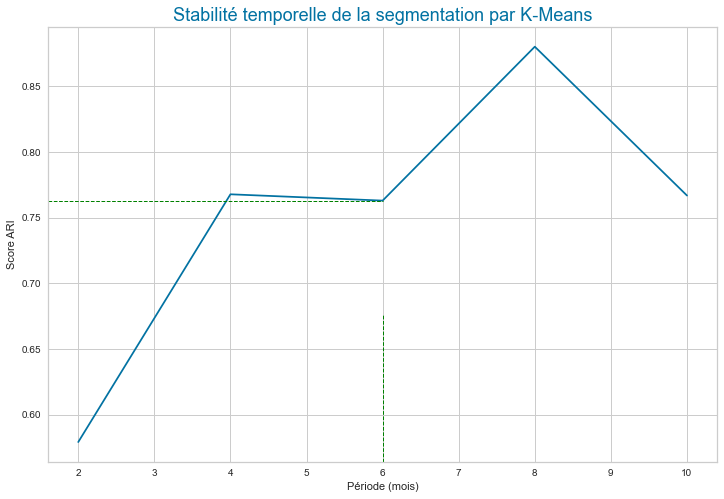

In [55]:
ari_score = pd.DataFrame(ari_score, columns = ["periode", "ARI"])

# plot ARI Score
fig = plt.figure(figsize = (12,8))
sns.lineplot(data = ari_score, x = "periode", y = "ARI")
plt.axhline(y = ari_score.iloc[2][1], linestyle = "--", 
            color = "green",
            xmax = 0.5,
            linewidth = 1)
plt.axvline(x = ari_score.iloc[2][0], linestyle = "--", 
            color = "green",
            ymax = 1.1-(ari_score.iloc[2][1]),
            linewidth = 1)
plt.xlabel("Période (mois)")
plt.ylabel("Score ARI")
plt.title("Stabilité temporelle de la segmentation par K-Means",
          fontsize = 18,
          color = "b")
plt.show()